## Investigate correlation
1. Pearson corr (features to output)
2. Spearman corr (features to output)
3. corr matrix (features vs feature) maybe multicollinearity is an issue?

## Feature selection in scikitlearn
4. Variance Threshold
5. Univariate
6. Recursive feature elimination

## Other feature selection
- cosine similarity
- Lasso feature selection
- PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr


from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("SubCh1_TrainingData.csv")
test = pd.read_csv("SubCh1_TestData.csv")

X = train.drop(['DHA_IC50','Sample_Name','Isolate', 'BioRep', 'Treatment', 'Timepoint'], axis = 1)
y = train['DHA_IC50']
# Rename the column title to be numbers
X.columns = ['X' + str(i) for i in range(1,5541)]
print(X.shape)
X.head(2)

(272, 5540)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X5531,X5532,X5533,X5534,X5535,X5536,X5537,X5538,X5539,X5540
0,0.008286,-0.959492,0.206468,-0.443936,0.453030,0.291222,-0.157282,-1.67681,0.37707,0.330400,...,0.210607,-0.540993,-3.674097,-1.652979,-2.255490,-4.554757,-0.381422,-1.415857,-4.121011,-2.486528
1,-0.872028,-1.968558,-2.308563,-1.186611,0.508575,-0.368476,2.566465,0.36685,1.28916,-0.513018,...,-0.447109,0.450649,-4.464408,-0.977954,-2.012559,-4.538550,-2.333890,-2.342496,-4.774197,-1.794568


In [525]:
# train['BioRep']

### 1. Find columns correlated to DHA_1C50 (pearson)

In [145]:
X_full = X.loc[:]
X_full['DHA'] = y
DHA_corr = X_full.corr()['DHA'].sort_values()

In [214]:
# DHA_corr.tolist()
# DHA_corr[0:20]   #inverse correlation
# DHA_corr[-20:-1] #positive correlation

In [205]:
# put the top 100 most correlated features (50 pos and 50 neg) into a datframe and save
neg_corr = pd.DataFrame(DHA_corr[0:50])
pos_corr = pd.DataFrame(DHA_corr[-51:-1])
top_100_pears_genes = neg_corr.index.tolist()
top_100_pears_genes.extend(pos_corr.index.tolist())
top_100_pears_genes = pd.DataFrame(top_100_pears_genes)
top_100_pears_genes[0:5]

,0
0,X176
1,X258
2,X2218
3,X257
4,X2203


In [206]:
# save this list (convert to a dataframe, then save df)
top_100_pears_genes.to_csv("./top_100_pear_genes.csv", index = False)

In [213]:
# verify we can extract the dataframe into our desired list

# df = pd.read_csv('./train.csv')
df = pd.read_csv('./top_100_pear_genes.csv')
# put this df into a list
df['0'].tolist()[0:5]

['X176', 'X258', 'X2218', 'X257', 'X2203']

### 2. Find columns with best spearman rank to DHA_IC50

#### method 1

In [233]:
# takes forever.... will this work the same as method 2??

DHA_spear = X_full.corr(method = 'spearman')['DHA'].sort_values()
DHA_spear

X176    -0.170365
X2203   -0.169174
X5200   -0.135326
X3793   -0.133834
X2218   -0.133058
X258    -0.133031
X4757   -0.132874
X2915   -0.132267
X3957   -0.132186
X257    -0.131804
X4355   -0.130500
X5054   -0.129786
X2248   -0.128981
X1837   -0.127335
X3324   -0.126564
X1569   -0.123256
X5310   -0.123077
X4      -0.121221
X3069   -0.120259
X1496   -0.119755
X4700   -0.119045
X4064   -0.118940
X3127   -0.117937
X3596   -0.117920
X2260   -0.117851
X2255   -0.117436
X4292   -0.117323
X636    -0.117295
X3654   -0.116757
X1288   -0.116690
           ...   
X4743    0.109385
X2272    0.109743
X3428    0.110954
X1607    0.111138
X459     0.111806
X280     0.112262
X3835    0.112836
X2599    0.113342
X4756    0.114209
X830     0.114672
X1184    0.117092
X2240    0.117488
X715     0.117734
X2564    0.117935
X3490    0.120103
X4406    0.120789
X2597    0.121032
X2155    0.124761
X252     0.125766
X5263    0.126143
X4240    0.126514
X718     0.126659
X240     0.126762
X605     0.126771
X1456    0

In [305]:
DHA_spear_df = pd.DataFrame(DHA_spear)
DHA_spear_df = DHA_spear_df.iloc[:-1]                 #leave out the 1.0 corr with DHA
DHA_spear_df = DHA_spear_df[abs(DHA_spear_df['DHA']) > 0.1]          # include corr with abs(val) > 0.1
top_128_spear_genes = DHA_spear_df.index.tolist()     #get the gene name only
top_128_spear_genes = pd.DataFrame(top_128_spear_genes)
print(len(top_128_spear_genes))
top_128_spear_genes[0:5]

128


,0
0,X176
1,X2203
2,X5200
3,X3793
4,X2218


In [306]:
# save this list (convert to a dataframe, then save df)
top_128_spear_genes.to_csv("./top_128_spear_genes.csv", index = False)

In [307]:
# verify we can extract the dataframe into our desired list

df = pd.read_csv('./top_128_spear_genes.csv')
df['0'].tolist()[0:5]      # put this df into a list

['X176', 'X2203', 'X5200', 'X3793', 'X2218']

#### method 2

In [169]:
# for i in range(X.shape[1]):
#     print(list(zip(enumerate(X)))[i][1])
list(zip(enumerate(X)))[1]

((1, 'X2'),)

In [287]:
# note: when comparing the spearman of a gene to the DHA_IC50, the score can be neg or positive
# (however, the spearman score of our pred to y_true must be positive spearman)

high_s = []
high_s_gene = []
for i in range(0, X.shape[1]):
    s, p = spearmanr(X.iloc[:, i], y)
    if np.abs(s) >= 0.1:                       #if spearman rank is above 0.12, record the column
        high_s.append((s, p, "X"+str(i+1)))
        high_s_gene.append("X"+str(i+1))
# print(high_s)

sorted_by_second = sorted(high_s, key=lambda tup: abs(tup[0]), reverse = True) #order by abs spear value, show column
sorted_by_second

[(-0.17036529706337003, 0.004841082777180304, 'X176'),
 (-0.16917353051444287, 0.005151199113745932, 'X2203'),
 (0.14219279563823, 0.018964015332239594, 'X1097'),
 (-0.13532640520102437, 0.025624335909584763, 'X5200'),
 (-0.13383371162771882, 0.027313016120033298, 'X3793'),
 (-0.13305751096959992, 0.028228261860107347, 'X2218'),
 (-0.13303123956270976, 0.02825969376687824, 'X258'),
 (-0.13287361112136867, 0.028448915679228283, 'X4757'),
 (-0.1322669804531773, 0.029187292853232197, 'X2915'),
 (-0.13218577792278946, 0.029287364502633494, 'X3957'),
 (0.13182753146519613, 0.029732368995256293, 'X2945'),
 (-0.13180364836802325, 0.029762240438532307, 'X257'),
 (-0.13049963126238348, 0.031432634818674435, 'X4355'),
 (-0.1297855266569141, 0.03238080496615384, 'X5054'),
 (-0.12898066628218774, 0.03347858249366481, 'X2248'),
 (0.1284528498346669, 0.034215549908494666, 'X2600'),
 (0.12793936324544977, 0.03494569491353766, 'X1626'),
 (-0.12733512088697568, 0.035821791134819085, 'X1837'),
 (0.12693

In [288]:
print(high_s_gene)  #NOTE: not sorted in order 

['X4', 'X34', 'X120', 'X176', 'X209', 'X233', 'X240', 'X247', 'X252', 'X255', 'X257', 'X258', 'X260', 'X280', 'X418', 'X446', 'X459', 'X579', 'X605', 'X636', 'X715', 'X718', 'X766', 'X830', 'X948', 'X1097', 'X1127', 'X1146', 'X1168', 'X1184', 'X1288', 'X1294', 'X1454', 'X1456', 'X1496', 'X1531', 'X1569', 'X1581', 'X1607', 'X1626', 'X1695', 'X1714', 'X1717', 'X1763', 'X1773', 'X1836', 'X1837', 'X2025', 'X2038', 'X2080', 'X2097', 'X2155', 'X2203', 'X2218', 'X2219', 'X2227', 'X2240', 'X2246', 'X2248', 'X2255', 'X2260', 'X2272', 'X2356', 'X2518', 'X2564', 'X2597', 'X2599', 'X2600', 'X2614', 'X2813', 'X2826', 'X2856', 'X2915', 'X2945', 'X3011', 'X3015', 'X3017', 'X3069', 'X3077', 'X3114', 'X3127', 'X3194', 'X3246', 'X3286', 'X3324', 'X3382', 'X3428', 'X3490', 'X3595', 'X3596', 'X3654', 'X3793', 'X3808', 'X3835', 'X3957', 'X4030', 'X4064', 'X4096', 'X4138', 'X4159', 'X4187', 'X4240', 'X4292', 'X4342', 'X4355', 'X4360', 'X4406', 'X4613', 'X4678', 'X4700', 'X4743', 'X4756', 'X4757', 'X4833', '

In [289]:
len(high_s_gene)

128

In [290]:
top_128_spear_genes_2 = pd.DataFrame(high_s_gene)
top_128_spear_genes_2[0:5]

,0
0,X4
1,X34
2,X120
3,X176
4,X209


In [291]:
# save df as csv
top_128_spear_genes_2.to_csv("./top_128_spear_genes_2.csv", index = False)

In [292]:
# df = pd.read_csv('./train.csv')
df = pd.read_csv('./top_128_spear_genes_2.csv')
# put this df into a list
df['0'].tolist()[0:5]

['X4', 'X34', 'X120', 'X176', 'X209']

#### Q: Are the list from method 1 and method 2 the same?

In [293]:
# for i in top_128_spear_genes:
#     print(i)
    
# top_128_spear_genes['0'].tolist()
method_1 = set(top_128_spear_genes[0].tolist())
method_1

{'X4235',
 'X1722',
 'X2623',
 'X2670',
 'X4499',
 'X3116',
 'X3252',
 'X253',
 'X1831',
 'X2271',
 'X3778',
 'X4705',
 'X3479',
 'X2834',
 'X2666',
 'X3546',
 'X1297',
 'X4240',
 'X644',
 'X3064',
 'X2149',
 'X3241',
 'X3422',
 'X925',
 'X2050',
 'X906',
 'X5220',
 'X240',
 'X2393',
 'X1320',
 'X6',
 'X2642',
 'X4713',
 'X538',
 'X5005',
 'X2267',
 'X3443',
 'X2721',
 'X345',
 'X2298',
 'X4724',
 'X4163',
 'X2302',
 'X201',
 'X3785',
 'X2845',
 'X782',
 'X2198',
 'X273',
 'X4712',
 'X2442',
 'X1960',
 'X3769',
 'X2561',
 'X1050',
 'X15',
 'X5012',
 'X2390',
 'X2449',
 'X4085',
 'X901',
 'X5216',
 'X2152',
 'X1223',
 'X2949',
 'X5320',
 'X2180',
 'X2554',
 'X540',
 'X1851',
 'X1138',
 'X482',
 'X5138',
 'X2626',
 'X4566',
 'X3267',
 'X2635',
 'X1055',
 'X2405',
 'X1956',
 'X3748',
 'X798',
 'X5120',
 'X4738',
 'X2889',
 'X3576',
 'X3815',
 'X2459',
 'X1155',
 'X1909',
 'X4579',
 'X1993',
 'X1582',
 'X3450',
 'X4461',
 'X316',
 'X1525',
 'X607',
 'X3532',
 'X3944',
 'X5139',
 'X595',
 '

In [294]:
method_2 = set(top_128_spear_genes_2[0].tolist())
method_2

{'X1097',
 'X1127',
 'X1146',
 'X1168',
 'X1184',
 'X120',
 'X1288',
 'X1294',
 'X1454',
 'X1456',
 'X1496',
 'X1531',
 'X1569',
 'X1581',
 'X1607',
 'X1626',
 'X1695',
 'X1714',
 'X1717',
 'X176',
 'X1763',
 'X1773',
 'X1836',
 'X1837',
 'X2025',
 'X2038',
 'X2080',
 'X209',
 'X2097',
 'X2155',
 'X2203',
 'X2218',
 'X2219',
 'X2227',
 'X2240',
 'X2246',
 'X2248',
 'X2255',
 'X2260',
 'X2272',
 'X233',
 'X2356',
 'X240',
 'X247',
 'X2518',
 'X252',
 'X255',
 'X2564',
 'X257',
 'X258',
 'X2597',
 'X2599',
 'X260',
 'X2600',
 'X2614',
 'X280',
 'X2813',
 'X2826',
 'X2856',
 'X2915',
 'X2945',
 'X3011',
 'X3015',
 'X3017',
 'X3069',
 'X3077',
 'X3114',
 'X3127',
 'X3194',
 'X3246',
 'X3286',
 'X3324',
 'X3382',
 'X34',
 'X3428',
 'X3490',
 'X3595',
 'X3596',
 'X3654',
 'X3793',
 'X3808',
 'X3835',
 'X3957',
 'X4',
 'X4030',
 'X4064',
 'X4096',
 'X4138',
 'X4159',
 'X418',
 'X4187',
 'X4240',
 'X4292',
 'X4342',
 'X4355',
 'X4360',
 'X4406',
 'X446',
 'X459',
 'X4613',
 'X4678',
 'X4700',


In [296]:
spear_intersect = method_1.intersection(method_2)
len(spear_intersect)

#so the same elements are in both lists!, and both methods find the same exact thing (method 2 was faster?)

128

#### Q: How similar are the pearson list and spearman list?

In [311]:
pears = pd.read_csv('./top_100_pear_genes.csv')
# put this df into a list
pears = set(pears['0'].tolist())
len(pears)

100

In [312]:
pears_spear_intersect =pears.intersection(method_2)
len(pears_spear_intersect)

48

***48 genes are in both lists***

### Combine these lists...

In [318]:
# pears_spear_intersect =pears.untion(method_2)
print(len(pears | method_2))
combined_corr = list(pears | method_2)


combined_corr_df= X.loc[:, combined_corr]
combined_corr_df.head()

180


,X4613,X2599,X3077,X1569,X636,X210,X2526,X4049,X1564,X3142,...,X4757,X4476,X3697,X4586,X4096,X2248,X1695,X2321,X3194,X2953
0,-0.037410,1.234467,-0.391703,-2.033240,-0.792961,0.053017,1.162518,-0.372693,0.108007,0.226320,...,-3.282937,-0.478781,0.593435,0.210079,-0.712470,-0.076152,0.437632,0.784177,-0.512936,-0.493035
1,-0.169231,0.636627,0.705099,0.156544,0.025997,0.251870,-0.937006,0.430540,-0.632109,0.067073,...,-2.569909,-0.556064,0.233272,0.943661,-0.257057,-0.171091,-0.007288,0.147424,-0.169555,-0.485220
2,0.293545,-0.652535,0.456405,0.716510,0.406586,0.710764,-0.101162,-0.296913,0.344732,-0.081056,...,-1.195457,1.011406,1.029065,1.233661,1.069205,1.273287,0.913856,0.529112,-0.049528,-0.011744
3,0.719299,-0.544673,0.364175,0.505736,0.230232,0.063128,-0.256138,-0.181990,-0.449422,-0.018459,...,-1.468765,-0.109916,0.179721,0.703417,-0.614392,0.097214,0.420149,0.120100,0.872170,-0.391568
4,0.255836,-0.466718,0.796435,0.265937,0.313297,0.320185,-0.082141,-0.992921,-0.306383,-0.226920,...,-1.030617,1.114630,0.618408,0.428060,-0.556844,0.826585,0.135597,-0.290796,0.024963,0.005929


### 3. Find all columsn most correlated to each other (to potentially remove for multicollinearity)

In [229]:
#get the corr coeff into a dataframe --> only include corr above 0.80

# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
#first element of sol series is the pair with the bigest correlation
sol = (c.where(np.triu(np.ones(c.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
feature_corr = pd.DataFrame(sol.round(3)) 

feature_corr.rename_axis(['a','b'], inplace = True)         #give the blank indices names
feature_corr.rename(columns = {0:'c'}, inplace = True)      #rename column
above_8 = feature_corr['c'] >= 0.8
above_8 = feature_corr[above_8]

above_8.reset_index(level=above_8.index.names, inplace=True)  #convert multiindex into columns
above_8.head()


,a,b,c
0,X1230,X1730,0.981
1,X45,X4987,0.980
2,X2282,X2836,0.976
3,X1096,X1617,0.974
4,X2283,X4005,0.973


In [230]:
print(above_8.shape)
print(round((above_8.shape[0] / ((5540*5540) - 5540 )) * 100, 4), "% features w/ corr >= 0.8")


(35329, 3)
0.1151 % features w/ corr >= 0.8


In [303]:
above_8['a'].value_counts()

X141     200
X337     193
X1685    192
X693     188
X540     186
X792     179
X759     167
X331     166
X1437    165
X1327    163
X618     160
X507     158
X791     153
X671     152
X1809    150
X833     147
X2091    145
X2057    142
X1472    141
X315     140
X1764    140
X1066    134
X525     134
X977     134
X2174    132
X619     131
X1830    128
X1099    128
X1076    123
X929     122
        ... 
X4986      1
X378       1
X2426      1
X3357      1
X3133      1
X4964      1
X2378      1
X1861      1
X4946      1
X821       1
X4193      1
X4479      1
X3558      1
X3050      1
X3363      1
X1874      1
X510       1
X3907      1
X1667      1
X4409      1
X4599      1
X4452      1
X4278      1
X4273      1
X3691      1
X5378      1
X3478      1
X5113      1
X627       1
X2296      1
Name: a, Length: 2294, dtype: int64

In [425]:
# above_8['b'].value_counts()

## Feature engineering thru scikit learn

### 4. Variance threshold
1. fit_transform to get array of selected features

In [405]:
from sklearn.feature_selection import VarianceThreshold #remove features with low variance (values are highly similar)

print(X.shape)
var_selector = VarianceThreshold(threshold= 0.5)         
X_new = var_selector.fit_transform(X)
print(X_new.shape)

     

(272, 5540)
(272, 893)


2. find the column names of the selected features (transform not required)

In [418]:
# var_selector.get_support()                                     #true/false of each feature  
# var_selector.variances_                                        #all variance scores 
var_names = X.columns.values[var_selector.get_support()]           #return the column names with scores retained
scores = var_selector.variances_[var_selector.get_support()]   #variance scores retained
var_names

array(['X5', 'X7', 'X8', 'X9', 'X14', 'X21', 'X23', 'X24', 'X25', 'X28',
       'X29', 'X30', 'X31', 'X35', 'X36', 'X38', 'X40', 'X44', 'X45',
       'X47', 'X48', 'X50', 'X51', 'X56', 'X57', 'X58', 'X60', 'X67',
       'X69', 'X73', 'X76', 'X78', 'X80', 'X81', 'X82', 'X85', 'X86',
       'X87', 'X90', 'X94', 'X96', 'X98', 'X99', 'X101', 'X102', 'X103',
       'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111',
       'X112', 'X113', 'X116', 'X121', 'X134', 'X136', 'X141', 'X143',
       'X158', 'X162', 'X179', 'X183', 'X184', 'X188', 'X228', 'X231',
       'X233', 'X234', 'X235', 'X237', 'X238', 'X239', 'X240', 'X241',
       'X242', 'X243', 'X244', 'X245', 'X246', 'X247', 'X248', 'X249',
       'X250', 'X251', 'X252', 'X253', 'X254', 'X255', 'X256', 'X257',
       'X258', 'X259', 'X260', 'X261', 'X262', 'X264', 'X277', 'X305',
       'X308', 'X310', 'X317', 'X318', 'X319', 'X320', 'X329', 'X345',
       'X347', 'X348', 'X367', 'X378', 'X387', 'X388', 'X390', 'X416',
     

### 5. Univaraite feature selection
#### F-scores
1. fit_transform to get array of selected features

In [404]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

print(X.shape)

X_new = SelectKBest(f_regression, k=100).fit_transform(X, y)  
print(X_new.shape)

(272, 5540)
(272, 100)


2. find the column names of the selected features

In [419]:
k_best_selector = SelectKBest(f_regression, k=100).fit(X,y)  #select features with the top 100 f scores
# X_new = k_best_selector.fit_transform(X, y)

f_names = X.columns.values[k_best_selector.get_support()]    #return the column names with top scores
scores = selector.scores_[k_best_selector.get_support()]
p_values = selector.pvalues_[k_best_selector.get_support()]
names_scores = list(zip(f_names, scores, p_values))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores', 'p_val'])
ns_df
# ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True]) #Sort the dataframe for better visualization


,Feat_names,F_Scores,p_val
0,X4,2.821036,0.094193
1,X14,3.089611,0.079927
2,X34,5.055329,0.025357
3,X68,3.752982,0.053756
4,X176,6.453832,0.011632
5,X209,2.359212,0.125716
6,X210,2.567021,0.110282
7,X233,2.643648,0.105131
8,X257,4.653365,0.031875
9,X258,5.313919,0.021914


In [420]:
f_names

array(['X4', 'X14', 'X34', 'X68', 'X176', 'X209', 'X210', 'X233', 'X257',
       'X258', 'X260', 'X261', 'X318', 'X392', 'X431', 'X446', 'X459',
       'X489', 'X643', 'X715', 'X718', 'X830', 'X909', 'X991', 'X1032',
       'X1078', 'X1146', 'X1161', 'X1168', 'X1184', 'X1247', 'X1294',
       'X1496', 'X1607', 'X1622', 'X1717', 'X1763', 'X1837', 'X1959',
       'X2120', 'X2203', 'X2215', 'X2218', 'X2219', 'X2227', 'X2246',
       'X2255', 'X2321', 'X2375', 'X2390', 'X2478', 'X2526', 'X2564',
       'X2597', 'X2788', 'X2856', 'X2894', 'X2915', 'X2930', 'X3011',
       'X3015', 'X3069', 'X3114', 'X3246', 'X3385', 'X3463', 'X3490',
       'X3511', 'X3572', 'X3590', 'X3596', 'X3654', 'X3697', 'X3793',
       'X3797', 'X3808', 'X3834', 'X3835', 'X3895', 'X3957', 'X4049',
       'X4066', 'X4215', 'X4292', 'X4298', 'X4333', 'X4406', 'X4460',
       'X4476', 'X4491', 'X4586', 'X4756', 'X4757', 'X4833', 'X5054',
       'X5200', 'X5263', 'X5310', 'X5372', 'X5378'], dtype=object)

#### Mutual_info_regression

In [426]:
k_best_selector = SelectKBest(mutual_info_regression, k=100).fit(X,y)  #select features with the top 100 f scores
# X_new = k_best_selector.fit_transform(X, y)

mut_names = X.columns.values[k_best_selector.get_support()]    #return the column names with top scores
scores = selector.scores_[k_best_selector.get_support()]
p_values = selector.pvalues_[k_best_selector.get_support()]
names_scores = list(zip(mut_names, scores, p_values))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'MV_Scores', 'p_val'])
ns_df

,Feat_names,MV_Scores,p_val
0,X21,0.341485,0.559461
1,X105,0.187141,0.665652
2,X211,0.937096,0.333892
3,X213,0.036139,0.849371
4,X225,0.002146,0.963089
5,X245,0.961461,0.327697
6,X380,0.147448,0.701288
7,X411,0.062267,0.803138
8,X452,0.077664,0.780702
9,X493,0.015456,0.901151


NOTE: these p-values are all much bigger... what does that mean exactly?

In [422]:
mut_names

array(['X21', 'X92', 'X105', 'X211', 'X213', 'X225', 'X245', 'X380',
       'X411', 'X452', 'X549', 'X604', 'X711', 'X730', 'X878', 'X917',
       'X933', 'X950', 'X1004', 'X1019', 'X1040', 'X1184', 'X1188',
       'X1194', 'X1230', 'X1591', 'X1657', 'X1739', 'X1743', 'X1748',
       'X1797', 'X1799', 'X1967', 'X2009', 'X2026', 'X2034', 'X2049',
       'X2052', 'X2054', 'X2066', 'X2157', 'X2201', 'X2222', 'X2224',
       'X2239', 'X2337', 'X2421', 'X2452', 'X2536', 'X2625', 'X2629',
       'X2666', 'X2764', 'X2767', 'X2790', 'X2800', 'X2881', 'X2919',
       'X2930', 'X2944', 'X2950', 'X2951', 'X2995', 'X3038', 'X3225',
       'X3333', 'X3394', 'X3395', 'X3474', 'X3487', 'X3500', 'X3741',
       'X3755', 'X3904', 'X3918', 'X4093', 'X4107', 'X4148', 'X4258',
       'X4259', 'X4304', 'X4421', 'X4453', 'X4544', 'X4570', 'X4582',
       'X4624', 'X4782', 'X4838', 'X4893', 'X5011', 'X5052', 'X5209',
       'X5259', 'X5283', 'X5301', 'X5437', 'X5460', 'X5465', 'X5471'],
      dtype=object)

In [424]:
len(set(mut_names) | set(f_names))

198

so the top 100 columns found by both univaraite methods are almost completely different

In [449]:
np.arange(5,4000,50)

array([   5,   55,  105,  155,  205,  255,  305,  355,  405,  455,  505,
        555,  605,  655,  705,  755,  805,  855,  905,  955, 1005, 1055,
       1105, 1155, 1205, 1255, 1305, 1355, 1405, 1455, 1505, 1555, 1605,
       1655, 1705, 1755, 1805, 1855, 1905, 1955, 2005, 2055, 2105, 2155,
       2205, 2255, 2305, 2355, 2405, 2455, 2505, 2555, 2605, 2655, 2705,
       2755, 2805, 2855, 2905, 2955, 3005, 3055, 3105, 3155, 3205, 3255,
       3305, 3355, 3405, 3455, 3505, 3555, 3605, 3655, 3705, 3755, 3805,
       3855, 3905, 3955])

#### Visualize f_regression: the number of features on the spearman score

In [450]:
# threshold testing k (for f scores), k = the number of top features to include

threshold = []
accuracy = []
mse = []
spearman = []
num_cols = []

for j in np.arange(5,4000,50):
    X_uni = SelectKBest(f_regression, k=j).fit_transform(X,y.values.ravel()) 
    X_uni = pd.DataFrame(data = X_uni)
    
    X_train, X_test , y_train , y_test = train_test_split(X_uni,y.values.ravel(),test_size=0.33,random_state=5)
      
    svc = svm.SVR(kernel = 'poly', degree = 4, C= 1)
    model = svc.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    threshold.append(j)
    accuracy.append(model.score(X_test, y_test))
    mse.append(mean_squared_error(y_test, pred))
    spearman.append(spearmanr(y_test, pred)[0])
    
results_unif = pd.DataFrame(list(zip(threshold, accuracy, mse, spearman)), columns = ['threshold', 'accuracy', 'mse', 'spearman'])
    

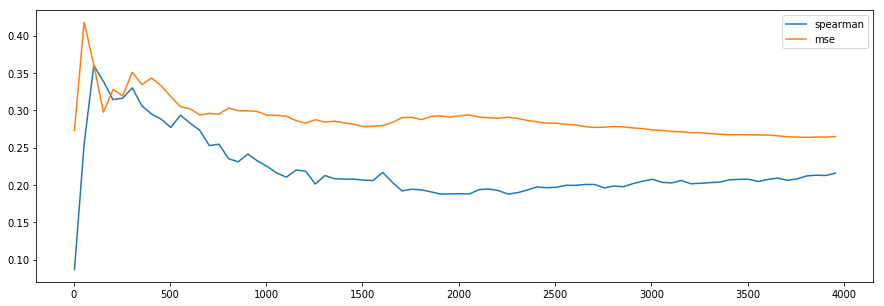

In [460]:
plt.figure(figsize=(15, 5))
plt.plot(results_unif['threshold'],results_unif['spearman'])
plt.plot(results_unif['threshold'],results_unif['mse'])
plt.legend()

#### Visualize mutual_info_regression the number of features on the spearman score

In [461]:
threshold = []
accuracy = []
mse = []
spearman = []
num_cols = []

for j in np.arange(5,4000,50):
    X_uni = SelectKBest(mutual_info_regression, k=j).fit_transform(X,y.values.ravel()) 
    X_uni = pd.DataFrame(data = X_uni)
    
    X_train, X_test , y_train , y_test = train_test_split(X_uni,y.values.ravel(),test_size=0.33,random_state=5)
      
    svc = svm.SVR(kernel = 'poly', degree = 4, C= 1)
    model = svc.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    threshold.append(j)
    accuracy.append(model.score(X_test, y_test))
    mse.append(mean_squared_error(y_test, pred))
    spearman.append(spearmanr(y_test, pred)[0])
    
results_unif = pd.DataFrame(list(zip(threshold, accuracy, mse, spearman)), columns = ['threshold', 'accuracy', 'mse', 'spearman'])
    

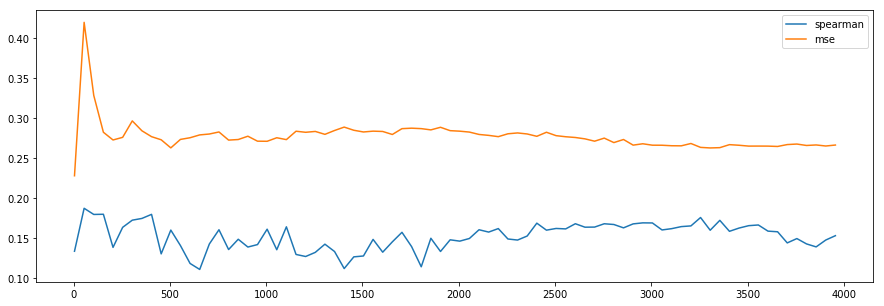

In [462]:
plt.figure(figsize=(15, 5))
plt.plot(results_unif['threshold'],results_unif['spearman'])
plt.plot(results_unif['threshold'],results_unif['mse'])
plt.legend()

#### Recursive feature elimination

In [428]:
from sklearn.feature_selection import RFECV, RFE


### Cosine similarity - between bioreps
- Significant features should not have wildly different measurements in rep 1 vs 2 ---> if a feature in biorep 1 and biorep 2 are NOT within a certain cosine similarity threshold, drop them
- could we also do these between timepoints? - no


In [51]:
from sklearn.metrics.pairwise import cosine_similarity


In [563]:
# X['X1'].values.reshape(1, -1) # shape = (1, 272)


In [509]:
# cosine_similarity(X['X5'].values.reshape(-1, 1), X['X7'].values.reshape(-1, 1))[0]

cosine_similarity(X['X1'].values.reshape(1, -1),  X['X4'].values.reshape(1, -1))

array([[-0.25768672]])

In [560]:
np.arange(0.1, 1.0, 0.08)

array([0.1 , 0.18, 0.26, 0.34, 0.42, 0.5 , 0.58, 0.66, 0.74, 0.82, 0.9 ,
       0.98])

In [561]:

# X_orig = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)].drop(['DHA_IC50','Sample_Name','Isolate'], axis=1)
# Y = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)][['DHA_IC50']]


X_cos = X.loc[:]
X_cos['BioRep'] = train['BioRep']
X_cos['BioRep'] = [int(i[-1]) for i in X_cos['BioRep']]

reps1 = X_cos[X_cos['BioRep']==1].drop(columns = ['BioRep'])
reps2 = X_cos[X_cos['BioRep']==2].drop(columns = ['BioRep'])

threshold = []
n_features = []
accuracy = []
mse = []
spearman = []
num_cols = []

for j in np.arange(0.1, 1.0, 0.08):
    drop_point = j
    names = []

    for i in range(len(X.columns)):
        if cosine_similarity(reps2.values[:,i].reshape(1, -1),reps1.values[:,i].reshape(1, -1))[0][0] < drop_point:
            names.append(X.columns[i])
    
    X_new = X.drop(names,axis=1)
    
#     max_features = min(len(X_new.columns),50)
    
#     X = StandardScaler().fit_transform(X_new)
    X_train, X_test , y_train , y_test = train_test_split(X_new, y, test_size=0.33,random_state=33)

#     forest_model = RandomForestRegressor(max_features=max_features,n_estimators=100, bootstrap=False,random_state = 999)
#     forest_model.fit(X_train, Y_train.values.ravel())
#     Y_pred = forest_model.predict(X_test)

    svc = svm.SVR(kernel = 'poly', degree = 4, C= 1)
    model = svc.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    threshold.append(j)
    accuracy.append(model.score(X_test, y_test))
    mse.append(mean_squared_error(y_test, pred))
    spearman.append(spearmanr(y_test, pred)[0])
    num_cols.append(len(X_new.columns))
    


results_cos = pd.DataFrame(list(zip(threshold,accuracy,mse,spearman,num_cols)),columns =['threshold', 'accuracy','mse','spearman','num_cols']) 

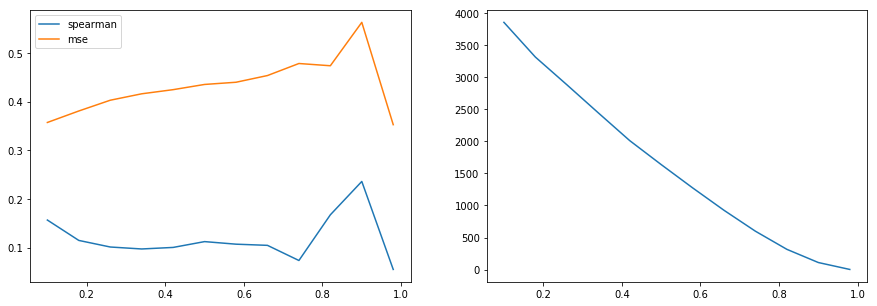

In [562]:
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(results_cos['threshold'], results_cos['spearman'])
plt.plot(results_cos['threshold'], results_cos['mse'])
plt.legend()
plt.subplot(122)
plt.plot(results_cos['threshold'], results_cos['num_cols'])


the mse score might be the highest it has been so far

In [583]:
np.arange(-.2, 0.91, 0.1)

array([-0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,
        0.9])

## cos similarity for untreated vs treated - drop things that are highly similar
- unlike rep1 vs rep1, important features will likely have different measurements in the treated vs untreated samples --> keep features with low cosine similarity score (drop features with high cosine similarity)


In [52]:
# cos similarity for untreated vs treated

X_cos = X.loc[:]
X_cos['Treatment'] = train['Treatment']
X_cos['Treatment'] = [1 if i == 'DHA' else 0 for i in X_cos['Treatment']]

treat1 = X_cos[X_cos['Treatment']==1].drop(columns = ['Treatment'])
treat0 = X_cos[X_cos['Treatment']==0].drop(columns = ['Treatment'])

threshold = []
accuracy = []
mse = []
spearman = []
num_cols = []

for j in np.arange(-.2, 0.91, 0.1):
    drop_point = j
    names = []

    for i in range(len(X.columns)):
        if cosine_similarity(treat1.values[:,i].reshape(1, -1),treat0.values[:,i].reshape(1, -1))[0][0] > drop_point:
            names.append(X.columns[i])
            
#     if len(names) > 0: 
    X_new = X.drop(names,axis=1)
    

    X_train, X_test , y_train , y_test = train_test_split(X_new, y, test_size=0.33,random_state=33)



    svc = svm.SVR(kernel = 'poly', degree = 4, C= 1)
    model = svc.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    threshold.append(j)
    accuracy.append(model.score(X_test, y_test))
    mse.append(mean_squared_error(y_test, pred))
    spearman.append(spearmanr(y_test, pred)[0])
    num_cols.append(len(X_new.columns))
    


results_cos = pd.DataFrame(list(zip(threshold,accuracy,mse,spearman,num_cols)),columns =['threshold', 'accuracy','mse','spearman','num_cols']) 

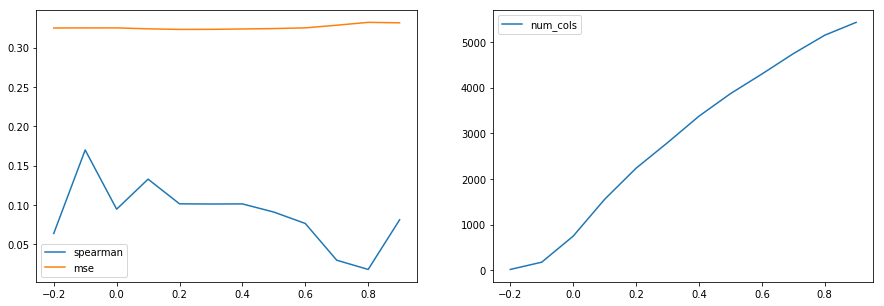

In [53]:
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(results_cos['threshold'], results_cos['spearman'])
plt.plot(results_cos['threshold'], results_cos['mse'])
plt.legend()
plt.subplot(122)
plt.plot(results_cos['threshold'], results_cos['num_cols'])
plt.legend()

Is it interesting that the mse doesn't change? 

## Drop out by spearman correlation coefficient
- if the spearman rank is too low for a column (with the target?, drop it)

In [618]:
matrix = spearmanr(X['X2'], y)
matrix


SpearmanrResult(correlation=-0.02810324044333864, pvalue=0.6444778342418738)

In [609]:
matrix2 = spearmanr(X, y)


In [619]:
matrix2[0] #(5541, 5541) spear scores
matrix2[0][0] #5541) scores for column 1
matrix2[0][1][-1]  #score for column 1 with y

-0.02810324044333864

In [620]:
X_sub = X.loc[:]
X_sub['DHA_IC50'] = train['DHA_IC50']

correlations = X_sub.corr(method='spearman')

#this takes forever!!! faster away above with spearman rank?

In [647]:
correlations['DHA_IC50']
correlations[abs(correlations['DHA_IC50']) > 0.16]
# list(correlations[abs(correlations['DHA_IC50']) < 0.1].index)
# correlations[correlations['DHA_IC50']]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X5532,X5533,X5534,X5535,X5536,X5537,X5538,X5539,X5540,DHA_IC50
X176,0.383589,-0.119339,-0.350803,-0.128740,-0.243895,-0.018921,0.372536,0.296198,0.579279,-0.130991,...,0.310150,-0.061100,-0.026657,-0.013713,0.090244,0.219097,-0.153198,0.202023,-0.029889,-0.170365
X2203,0.415306,-0.117475,0.255232,-0.099443,-0.048155,0.214688,0.088328,0.424522,0.269079,-0.147711,...,0.156539,-0.155246,-0.109347,-0.078732,0.053134,-0.107443,0.018885,-0.014523,-0.176220,-0.169174
DHA_IC50,-0.074685,-0.028103,-0.028087,-0.121221,-0.038894,-0.004139,0.001034,-0.062044,-0.070923,-0.047377,...,-0.074494,-0.051277,0.075158,0.099261,-0.024246,0.072552,-0.018254,0.023969,-0.050551,1.000000


In [649]:
np.arange(0.05,0.16, 0.01)

array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15])

In [650]:
# sub = train_data[(train_data['Timepoint'] == 1) & (train_data['Treatment'] == 1)]
# X_orig = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)].drop(['DHA_IC50','Sample_Name','Isolate'], axis=1)
# Y = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)][['DHA_IC50']]

# correlations = sub.corr(method='spearman')

threshold = []
accuracy = []
mse = []
spearman = []
num_cols = []

for j in np.arange(0.05,0.16, 0.01):
    drop_point = j
    names = list(correlations[abs(correlations['DHA_IC50']) < drop_point].index)
    
    X_new = X.drop(names,axis=1)
    
#     max_features = min(len(X_new.columns),50)
    

    
    X_train, X_test , y_train , y_test = train_test_split(X_new, y, test_size=0.33,random_state=33)

    svc = svm.SVR(kernel = 'poly', degree = 4, C= 1)
    model = svc.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    threshold.append(j)
    accuracy.append(model.score(X_test, y_test))
    mse.append(mean_squared_error(y_test, pred))
    spearman.append(spearmanr(y_test, pred)[0])
    num_cols.append(len(X_new.columns))
    


results_cos = pd.DataFrame(list(zip(threshold,accuracy,mse,spearman,num_cols)),columns =['threshold', 'accuracy','mse','spearman','num_cols']) 



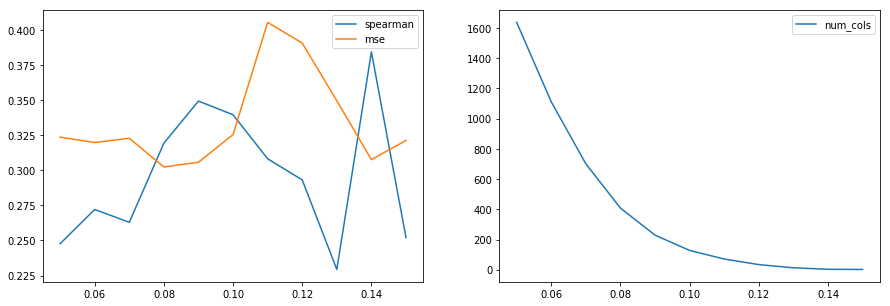

In [651]:
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(results_cos['threshold'], results_cos['spearman'])
plt.plot(results_cos['threshold'], results_cos['mse'])
plt.legend()
plt.subplot(122)
plt.plot(results_cos['threshold'], results_cos['num_cols'])
plt.legend()

### PCA - determine the number of transformed features to use
- this one takes forever!

In [3]:
from sklearn.decomposition import PCA

In [5]:
np.arange(3,200, 20)

array([  3,  23,  43,  63,  83, 103, 123, 143, 163, 183])

In [11]:

threshold = []
accuracy = []
mse = []
spearman = []
num_cols = []

for j in np.arange(3,200, 20):
    pca = PCA(n_components=j)
    principalComponents = pca.fit_transform(X)
    X_pca = pd.DataFrame(data = principalComponents)
    
#     max_features = min(j,50)

    X_train, X_test , y_train , y_test = train_test_split(X_pca, y, test_size=0.33, random_state=33)

    
    svc = svm.SVR(kernel = 'poly', degree = 4, C= 1)
    model = svc.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    threshold.append(j)
    accuracy.append(model.score(X_test, y_test))
    mse.append(mean_squared_error(y_test, pred))
    spearman.append(spearmanr(y_test, pred)[0])
    num_cols.append(len(X_pca.columns))
    

results_pca = pd.DataFrame(list(zip(threshold,accuracy,mse,spearman,num_cols)),columns =['threshold', 'accuracy','mse','spearman','num_cols']) 

In [12]:
results_pca

,threshold,accuracy,mse,spearman,num_cols
0,3,-8.877361e+07,2.892531e+07,0.160118,3
1,23,-2.028604e-01,3.919308e-01,0.233556,23
2,43,-1.169700e-01,3.639449e-01,0.206865,43
3,63,-5.097000e-02,3.424400e-01,0.233753,63
4,83,-4.290450e-02,3.398120e-01,0.229510,83
5,103,-2.262386e-02,3.332039e-01,0.215311,103
6,123,-1.877734e-02,3.319506e-01,0.203149,123
7,143,-1.277982e-02,3.299964e-01,0.200553,143
8,163,-6.458233e-03,3.279366e-01,0.203561,163
9,183,-3.368026e-03,3.269297e-01,0.198460,183


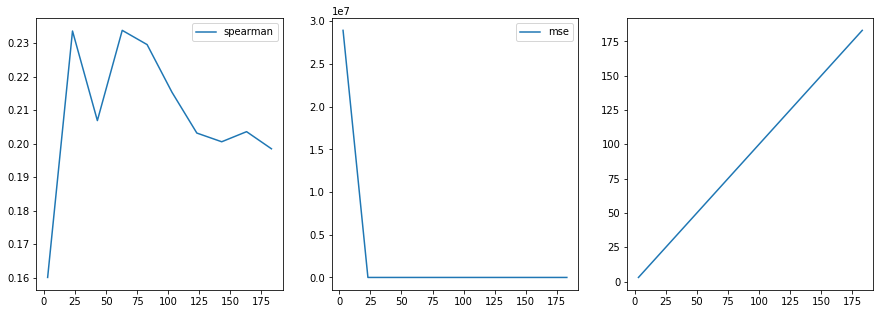

In [17]:
plt.figure(figsize = (15, 5))
plt.subplot(131)
plt.plot(results_pca['threshold'], results_pca['spearman'])
plt.legend()
plt.subplot(132)
plt.plot(results_pca['threshold'], results_pca['mse'])
plt.legend()
plt.subplot(133)
plt.plot(results_pca['threshold'], results_pca['num_cols'])

It looks like PCA might be most effective when its used with ~25 features (before any feature reduction at least)

## Recursive Feature Elimination

In [18]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [4]:
X.values.shape

(272, 5540)

In [ ]:
# to get the column names without transforming
X_new = selector.fit_transform(X, y)
print(X_new.shape)
X_new

In [5]:
estimator = SVR(kernel="linear")  #doesn't work on poly kernel?
rfe = RFE(estimator, 100)
rfe_selector = rfe.fit(X , y)

# print(selector.support_)  # print summaries for the selection of attributes
# print(selector.ranking_)
# print(selector.n_features_)

In [8]:
print(rfe_selector.support_)  # print summaries for the selection of attributes
print(rfe_selector.ranking_)
print(rfe_selector.n_features_)


[False  True False ... False False False]
[3460    1 4981 ... 1797 2711 4543]
100


In [9]:
#print the column list
X_new = X.columns.values[rfe_selector.get_support()]
X_new

array(['X2', 'X14', 'X30', 'X38', 'X54', 'X96', 'X100', 'X215', 'X247',
       'X253', 'X261', 'X440', 'X447', 'X450', 'X463', 'X474', 'X475',
       'X720', 'X908', 'X946', 'X947', 'X948', 'X1048', 'X1056', 'X1099',
       'X1103', 'X1249', 'X1255', 'X1278', 'X1289', 'X1465', 'X1583',
       'X1598', 'X1726', 'X1770', 'X1802', 'X1821', 'X1837', 'X1852',
       'X1866', 'X1896', 'X1988', 'X2022', 'X2080', 'X2206', 'X2218',
       'X2220', 'X2231', 'X2235', 'X2237', 'X2240', 'X2360', 'X2465',
       'X2587', 'X2596', 'X2609', 'X2623', 'X2708', 'X2880', 'X2890',
       'X2995', 'X3045', 'X3054', 'X3215', 'X3265', 'X3290', 'X3318',
       'X3360', 'X3476', 'X3477', 'X3596', 'X3654', 'X3678', 'X3755',
       'X3759', 'X3903', 'X3978', 'X4011', 'X4025', 'X4049', 'X4063',
       'X4150', 'X4205', 'X4215', 'X4328', 'X4597', 'X4608', 'X4745',
       'X4808', 'X4883', 'X4911', 'X4955', 'X4966', 'X5181', 'X5263',
       'X5511', 'X5518', 'X5521', 'X5523', 'X5528'], dtype=object)

In [15]:
print(X[X_new].shape)
X[X_new].head()

(272, 100)


,X2,X14,X30,X38,X54,X96,X100,X215,X247,X253,...,X4911,X4955,X4966,X5181,X5263,X5511,X5518,X5521,X5523,X5528
0,-0.959492,-0.644621,-1.195826,1.264195,0.777027,-0.232066,0.542842,0.471647,-0.736109,-0.222957,...,0.652645,-0.021192,-0.311063,1.183695,1.273673,-0.639428,-0.895934,-1.163296,1.438021,1.198509
1,-1.968558,-2.569813,-1.012102,-1.169231,-0.197460,-0.536241,-0.592993,0.418255,-0.968071,-2.630935,...,-0.720031,0.323610,0.883934,0.993656,0.342256,0.013986,1.503271,1.522183,-0.408926,-0.595123
2,-1.291371,-1.899245,0.303967,-1.689696,0.042832,-2.538311,-0.796742,0.542968,-0.429998,-2.568824,...,-0.720069,-0.232757,0.301582,0.716108,0.386491,2.479581,0.983322,1.931367,-0.369478,-0.179335
3,-1.462758,-2.866347,-1.047550,-1.435122,0.083313,-2.050445,-0.493030,1.103035,-1.673841,-2.142580,...,-0.363362,0.610698,0.228557,0.567344,-0.014673,-0.820709,0.605634,1.674015,0.242462,0.459045
4,-2.139128,-2.962420,-1.577291,-1.239685,-1.238347,-1.647738,-0.893106,1.869155,-0.638658,-3.199059,...,0.457170,-0.194338,0.305196,1.323600,0.564132,-0.213012,-0.447100,-1.136758,-0.984013,0.811972


In [17]:

    
X_train, X_test , y_train , y_test = train_test_split(X[X_new],y.values.ravel(),test_size=0.33,random_state=5)

svc = svm.SVR(kernel = 'poly', degree = 4, C= 1)
model = svc.fit(X_train, y_train)
pred = model.predict(X_test)


print(model.score(X_test, y_test))
print(mean_squared_error(y_test, pred))
print(spearmanr(y_test, pred)[0])
    
    

-0.19827378227956835
0.28222157605327874
0.3713798735666917
